<h1 align="center"><strong>Filter methods code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **1- Variance Threshold ['VarianceThreshold']**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier

# Additional feature selection methods
from skfeature.function.similarity_based import fisher_score
from boruta import BorutaPy

In [6]:
# Example dataset
df = pd.DataFrame({
    'A': [1, 1, 1, 1, 1],   # low variance (constant)
    'B': [1, 2, 3, 4, 5],   # high variance
    'C': [2, 2, 2, 3, 3]    # medium variance
})

X = df.values
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

print("Remaining features:", df.columns[selector.get_support()].tolist())

Remaining features: ['B', 'C']


In [10]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Apply Variance Threshold
threshold = 0.2     # You can set the threshold as needed
selector  = VarianceThreshold(threshold)
X_reduced = selector.fit_transform(X)
print(f"Original features: \n{X.columns.tolist()}\n")
print(f"Selected features after Variance Threshold: \n{X.columns[selector.get_support()].tolist()}")

Original features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Selected features after Variance Threshold: 
['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **2- correlation coefficient ['corr']**

* **Pearson:** Linear relationship (continuous variables).
* **Spearman:** Monotonic relationship (ranked data).
* **Kendall’s Tau:** Rank-based association.
* **Point-Biserial:** Continuous vs. binary variable.

Selected features based on Correlation Coefficient: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


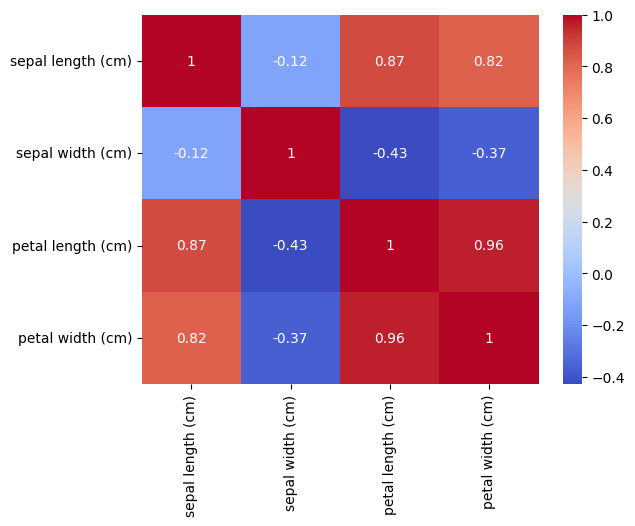

In [12]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Calculate correlation matrix
corr_matrix = X.corr()

# Select features with a correlation higher than 0.5 with the target
selected_features = corr_matrix.columns[corr_matrix.abs().max() > 0.5]

print(f"Selected features based on Correlation Coefficient: \n{selected_features.tolist()}")

# Optional: Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Kendall Correlation Coefficient Matrix:


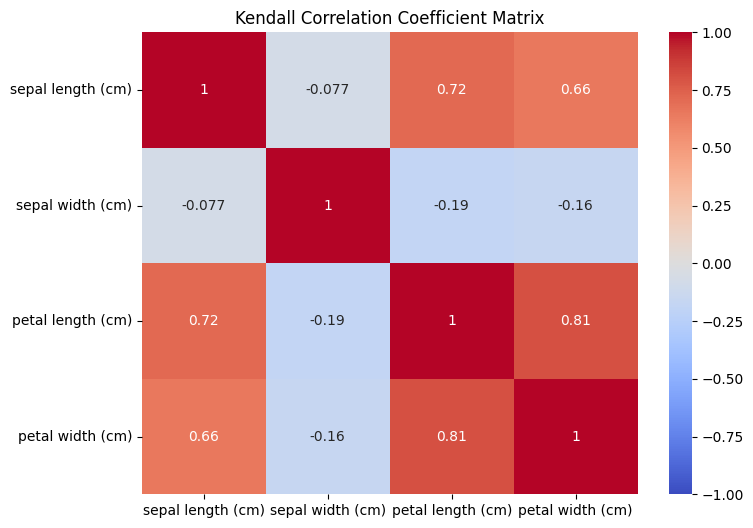

In [14]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Calculate Pearson correlation matrix
corr_matrix = X.corr(method='kendall')

print("Kendall Correlation Coefficient Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall Correlation Coefficient Matrix')
plt.show()

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **3- Chi-Square Test ['chi2']**

* Tests independence between categorical variables.
* Requires categorical data.
* **Binarization:** Converts continuous values into 0/1 using a threshold.
* Used to make continuous/ordinal data suitable for Chi-Square.

In [16]:
# Example categorical dataset
data = {
    'Color': [0, 1, 2, 0, 1, 2],  # 0=Red,1=Green,2=Blue
    'Shape': [1, 0, 1, 0, 1, 0],  # 0=Square,1=Circle
    'Target': [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

X = df[['Color', 'Shape']]
y = df['Target']

chi_selector = SelectKBest(chi2, k=1)
X_new = chi_selector.fit_transform(X, y)

print("Chi2 scores:", chi_selector.scores_)
print(f"Selected features based on Chi-Square Test: \n{X.columns[chi_selector.get_support()].tolist()}")

Chi2 scores: [0. 3.]
Selected features based on Chi-Square Test: 
['Shape']


In [19]:
# Binarize the data to make it suitable for the Chi-square test
X_binarized = Binarizer().fit_transform(X)

# Apply Chi-square test
chi2_selector = SelectKBest(chi2, k=2)  # Select top 2 features
X_reduced = chi2_selector.fit_transform(X_binarized, y)

print(f"Selected features based on Chi-Square Test: \n{X.columns[chi2_selector.get_support()].tolist()}")

Selected features based on Chi-Square Test: 
['Color', 'Shape']


<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **4- Mutual Information ['mutual_info_classif']**

In [26]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Apply Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print(f"Mutual Information scores: \n{mi_series}\n")
print(f"Selected features based on Mutual Information: \n{X.columns[mi_series > 0].tolist()}")

Mutual Information scores: 
petal length (cm)    0.982073
petal width (cm)     0.980328
sepal length (cm)    0.514745
sepal width (cm)     0.292419
dtype: float64

Selected features based on Mutual Information: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **5- ANOVA F-test ['f_classif']**

In [28]:
# Apply ANOVA F-test
f_values, p_values = f_classif(X, y)
f_values_series = pd.Series(f_values, index=X.columns).sort_values(ascending=False)

print(f"ANOVA F-values: \n{f_values_series}\n")
print(f"Selected features based on ANOVA F-test: \n{X.columns[f_values_series > 0].tolist()}")

ANOVA F-values: 
petal length (cm)    1180.161182
petal width (cm)      960.007147
sepal length (cm)     119.264502
sepal width (cm)       49.160040
dtype: float64

Selected features based on ANOVA F-test: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
# Apply ANOVA F-test
anova = SelectKBest(score_func=f_classif, k=2)
X_new = anova.fit_transform(X, y)

print(f"ANOVA F-scores: \n{anova.scores_}\n")
print(f"Selected features based on ANOVA F-test: \n{X.columns[anova.get_support()].tolist()}")

ANOVA F-scores: 
[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]

Selected features based on ANOVA F-test: 
['petal length (cm)', 'petal width (cm)']


<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **6- Information Gain ['mutual_info_classif']**

In [30]:
# Information Gain is similar to Mutual Information
# Apply Mutual Information as a proxy for Information Gain
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print(f"Information Gain (approximated by Mutual Information): \n{mi_series}\n")

Information Gain (approximated by Mutual Information): 
petal width (cm)     1.000357
petal length (cm)    0.983997
sepal length (cm)    0.489471
sepal width (cm)     0.241093
dtype: float64



<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **7- Univariate Feature Selection**
- # **fisher score**

In [34]:
data = load_breast_cancer()
X, y = data.data, data.target

# Compute Fisher Scores
scores = fisher_score.fisher_score(X, y)

# Rank features
ranked_features = np.argsort(scores)[::-1]  # descending order
selected_features = [data.feature_names[i] for i in ranked_features[:10]]

print("Top 10 features by Fisher Score:")
for feat, score in zip(selected_features, scores[ranked_features[:10]]):
    print(f"{feat:<22}: {score:.3f}")

Top 10 features by Fisher Score:
mean concavity        : 29.000
symmetry error        : 28.000
mean smoothness       : 27.000
mean concave points   : 26.000
worst radius          : 25.000
radius error          : 24.000
mean symmetry         : 23.000
mean perimeter        : 22.000
worst texture         : 21.000
worst concave points  : 20.000


<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **8- boruta feature selection 'wrapper/ensemble methods'**

In [36]:
X, y = load_breast_cancer(return_X_y=True)

# Random forest as base estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Boruta
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)
boruta.fit(X, y)

# Results
print(f"Selected  features: \n{boruta.support_}")
print('-'*50)
print(f"Tentative features: \n{boruta.support_weak_}")      # Features that not truly selected but not rejected

Selected  features: 
[ True  True  True  True  True  True  True  True False False  True False
  True  True False False  True  True False False  True  True  True  True
  True  True  True  True  True  True]
--------------------------------------------------
Tentative features: 
[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False]


In [37]:
data = load_breast_cancer(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
df =df.drop(columns=["target"])

# Selected features
selected_features = df.columns[boruta.support_]
print("Selected Features:")
print(selected_features.tolist())

# Tentative features
tentative_features = df.columns[boruta.support_weak_]
print("\n Tentative Features:")
print(tentative_features.tolist())

Selected Features:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

 Tentative Features:
['compactness error']
